# Problem1

## Problem Statement
The objective is to analyse the dataset in order to generate actionable insights which can be used to understand the demand of customers and help company improve customer experience.

## Data Description
The dataset includes various attributes pertaining to car owners.

## Dataset Used
austo_automobile.csv

## Domain
Marketing

## Attribute Information
* age: The age of the individual in years.
* gender: The gender of the individual, categorized as male or female.
* profession: The occupation or profession of the individual.
* marital_status: The marital status of the individual, such as married &, single
* education: The educational qualification of the individual Graduate and Post Graduate
* no_of_dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* house_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* salary: The individual's salary or income.
* partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* price: The price of a product or service.
* make: The type of automobile

## Loading relevant libraries for analysis

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# checking the versions of vaious libraries used
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.24.3
2.0.3
0.12.2


## Loading data

In [3]:
# loading csv file
automobile_data = pd.read_csv("D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_2_SMDM/austo_automobile.csv")

## Describe the data

In [4]:
# taking a glimpse of the data
automobile_data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


Based on the snapshot provided, our expectation is that the dataset contains 8 categorical columns of object type and 6 columns of int64 or float64 data types.

In [5]:
# size of dataset
automobile_data.shape

(1581, 14)

Dataset has 1581 rows and 14 columns

In [6]:
# information about features of dataset
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


Dataset has 8 object type and 6 numeric columns. Additionally, Gender and Partner_salary has missing values.

In [7]:
# staistical summary of data
automobile_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


### Observations
Based on the initial inspection of the data using the "head" function, we anticipated specific data types for different columns. Upon further examination using the "info" function, we confirmed that the observed data types align with our expectations, reflecting consistency between the initial snapshot and the overall data structure. Additionally, we noted the presence of missing data, which will be addressed during the pre-processing phase.

Furthermore, from the statistical summary, it appears that the range for numeric data is acceptable. However, for categorical data, we need to conduct further checks to identify any potential spelling mistakes.

## Pre-processing data
#### Removing duplicates

In [8]:
# checking for duplicates
print(f"number of duplicate rows = {automobile_data.duplicated().sum()}")

number of duplicate rows = 0


#### Checking for categorical features for bad data 

In [9]:
# checking unique values for categorical features
for column in automobile_data.columns:
    if automobile_data[column].dtype == 'object':
        print(f'unique values in column "{column}": ')
        print(automobile_data[column].unique())

unique values in column "Gender": 
['Male' 'Femal' 'Female' nan 'Femle']
unique values in column "Profession": 
['Business' 'Salaried']
unique values in column "Marital_status": 
['Married' 'Single']
unique values in column "Education": 
['Post Graduate' 'Graduate']
unique values in column "Personal_loan": 
['No' 'Yes']
unique values in column "House_loan": 
['No' 'Yes']
unique values in column "Partner_working": 
['Yes' 'No']
unique values in column "Make": 
['SUV' 'Sedan' 'Hatchback']


In the gender column, there are typing mistakes where "Female" is written as "Femal" and "Femle". We need to rectify these errors.

In [10]:
automobile_data['Gender'].replace(['Femal', 'Femle'], 'Female', inplace = True)

In [11]:
# checking unique values for categorical features
for column in automobile_data.columns:
    if automobile_data[column].dtype == 'object':
        print(f'unique values in column "{column}": ')
        print(automobile_data[column].unique())

unique values in column "Gender": 
['Male' 'Female' nan]
unique values in column "Profession": 
['Business' 'Salaried']
unique values in column "Marital_status": 
['Married' 'Single']
unique values in column "Education": 
['Post Graduate' 'Graduate']
unique values in column "Personal_loan": 
['No' 'Yes']
unique values in column "House_loan": 
['No' 'Yes']
unique values in column "Partner_working": 
['Yes' 'No']
unique values in column "Make": 
['SUV' 'Sedan' 'Hatchback']


#### Missing value treatment

In [12]:
# checking for missing values
automobile_data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

It's evident that there are a small number of missing values, concentrated within just two columns: "Gender" and "Partner_salary". 
Based on the available details, we understand that "Gender" is categorical, while "Partner_salary" is numerical. The techniques employed to impute values differ based on the data types: 
* for "Gender" we'll utilize mode values, representing the most frequent ones.
* for "Partner_salary": we'll group by "Partner_working", if extreme outliers are absent, we'll employ the mean value; however, in the presence of extreme outliers, we'll resort to the median value. 

We can obtain the mean, median, and mode by displaying a statistical summary. 

If the disparity between the mean and median values is negligible, it suggests the absence or minimal presence of outliers, in which case we'll use the mean. Conversely, if the difference is substantial, it indicates the existence of extreme outliers, prompting the use of the median.

In [13]:
# statistical summary of 'Gender' 
automobile_data['Gender'].describe()

count     1528
unique       2
top       Male
freq      1199
Name: Gender, dtype: object

Gender of most customers (Mode value) is Male accounting for over 75% of the instances in the data.

In [14]:
# Replacing null values in Gender column with mode value
mode_gender = automobile_data['Gender'].mode().values[0]
automobile_data['Gender'] = automobile_data['Gender'].replace(np.nan, mode_gender)

In [15]:
# check for missing values in Gender column
automobile_data['Gender'].isnull().sum()

0

In [16]:
# statistical summary of 'Partner_salary' grouped by 'Partner_working'
automobile_data.groupby(['Partner_working'])['Partner_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,623.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Yes,852.0,35014.906103,12046.487544,100.0,28400.0,32900.0,40300.0,80500.0


Non-working partners have 0 income, we will impute the value as 0 in the "Partner_salary" column for such cases. However, for working partners, where there's a notable disparity between the mean and median values—indicating right skewness in the data—we will impute the median value.

In [17]:
# Replacing null values in Partner_salary column
condition = automobile_data['Partner_working'] == 'Yes'
automobile_data['Partner_salary'] = automobile_data['Partner_salary'].fillna(value = pd.Series(
    [32900.0 if cond else 0.0 for cond in condition], index = automobile_data.index))

In [18]:
# check for missing values
automobile_data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

#### Statistical summary of data

In [19]:
automobile_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1581,2,Male,1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


## Exploratory Data Analysis(EDA)
### Univariate Analysis

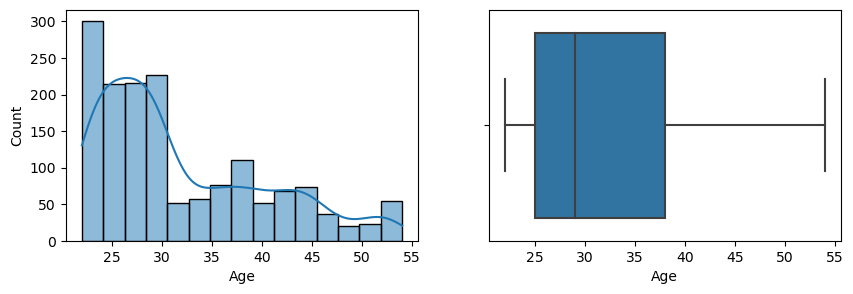

In [20]:
# Distribution of Age
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
sns.histplot(automobile_data['Age'], kde=True, ax=axs[0])
sns.boxplot(x='Age' ,data=automobile_data, ax=axs[1])
plt.show()

#### Observation
As per the above plot most people in the dataset are aged below 30 with median value of 29 and highest number aged around 22 and 23. This data does not has any outliers and from plot 1 we can conclude that our targeted demography is young people aged between 22 and 30, maybe, first time car buyers, which could be explored further.

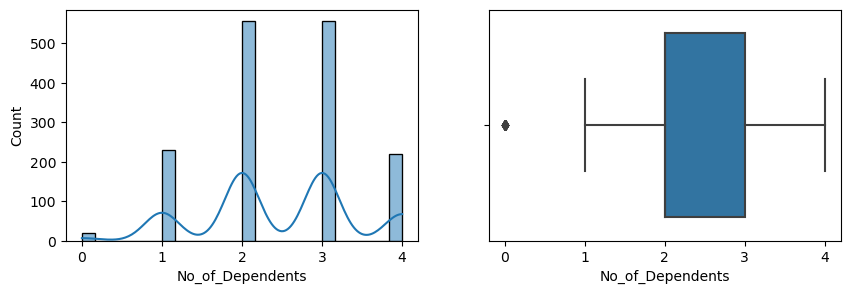

In [21]:
# Distribution of No_of_Dependents
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
sns.histplot(automobile_data['No_of_Dependents'], kde=True, ax=axs[0])
sns.boxplot(x='No_of_Dependents' ,data=automobile_data, ax=axs[1])
plt.show()

#### Observation
Since No_of_Dependents has numeric values so it got plotted, however, it is an categorical column as data in it cannot be continuous. The plot indicates that the majority of customers have dependents, with no dependents being an outlier. Both the first quartile and median values are 2, and multiple modes are observed at 2 and 3. Understanding who these dependents are could offer valuable insights aligned with our business objectives. 

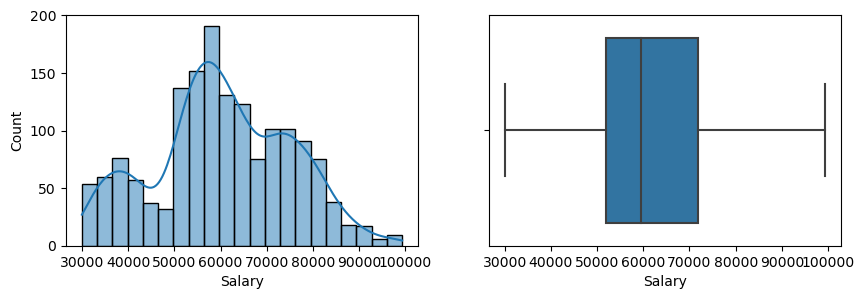

In [22]:
# Distribution of Salary
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
sns.histplot(automobile_data['Salary'], kde=True, ax=axs[0])
sns.boxplot(x='Salary' ,data=automobile_data, ax=axs[1])
plt.show()

#### Observation
The plot looks like a normal distribution with median value of around 60000 and IQR range of 50000 and 71000.

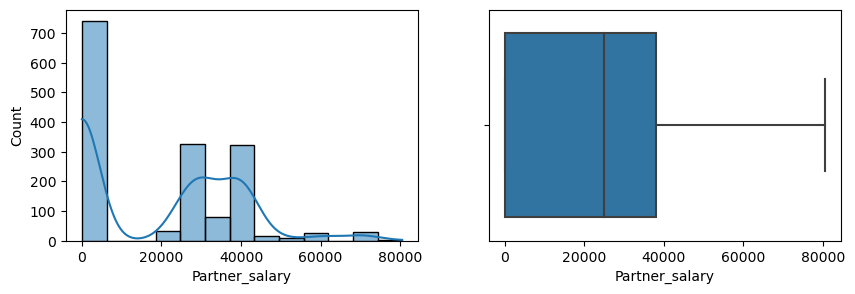

In [23]:
# Distribution of Partner_salary
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
sns.histplot(automobile_data['Partner_salary'], kde=True, ax=axs[0])
sns.boxplot(x='Partner_salary' ,data=automobile_data, ax=axs[1])
plt.show()

#### Observation
From the Plot it's evident that more than 40% of customers have partners with minimal or zero earnings, contributing to a slight right skew in the data. Notably, there are no outliers observed. For individuals with earning partners, their partners salary exhibits multiple modes, first clustered around 25000 and second around 40000. 

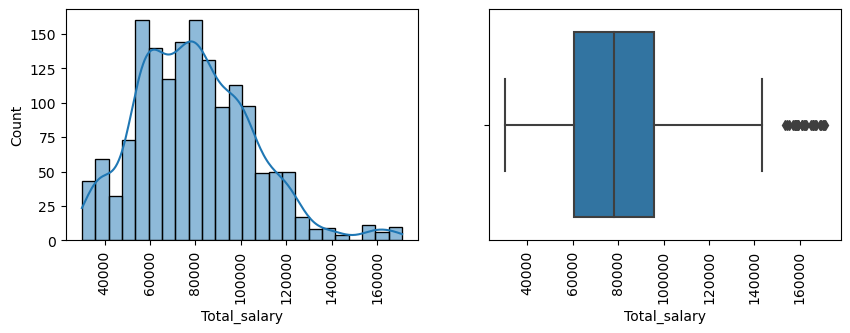

In [24]:
# Distribution of Total_salary
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
sns.histplot(automobile_data['Total_salary'], kde=True, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.boxplot(x='Total_salary' ,data=automobile_data, ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
plt.show()

#### Observation
Total salary has a median value of around 80000 with two modes one coming around 60000 and another around 75000. From the boxplot we can clearly imply that the plot is right skewed having outliers.

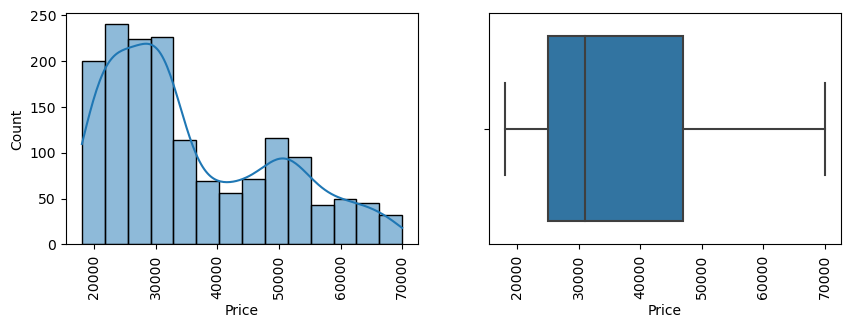

In [25]:
# Distribution of Price
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
sns.histplot(automobile_data['Price'], kde=True, ax=axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.boxplot(x='Price' ,data=automobile_data, ax=axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
plt.show()

#### Observation
For Austo Motor Company most sales come for the cars priced in the range of 20000 and 30000 with a median value of around 31000 and there are no outliers.


#### Note:
Based on the univariate analysis of numeric columns, for those with continuous data, only "Total_salary" column has outliers. However, we will not be treating these outliers as while doing bivariate analysis these outliers might provide some distinct trends regarding customers with considerably higher income like customers with higher total salary might be purchasing higher priced cars more and this rather than creating a bias might create an opportunity for us to target and sell more higher priced cars to such people.

Moreover, the "Total_income" column serves as a dependent variable, representing the sum of the "Salary" and "Partner_salary" columns. Both of these constituent columns lack outliers. Hence, there might be a correlation suggesting that individuals with higher salaries also have partners with higher salaries, which is validated to some degree by the presence of outliers in the "Total_income" column.

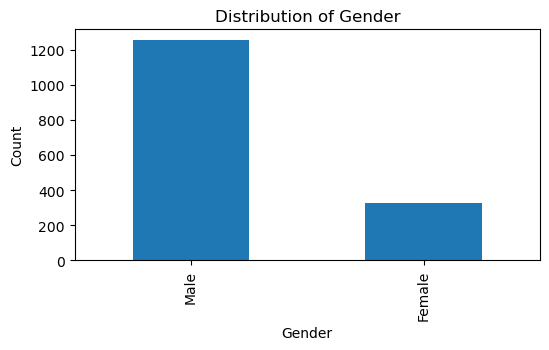

In [26]:
# Distribution of gender
plt.figure(figsize=(6, 3))
automobile_data['Gender'].value_counts().plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")    
plt.show()

#### Observation
In our data over 75% of customers are male.

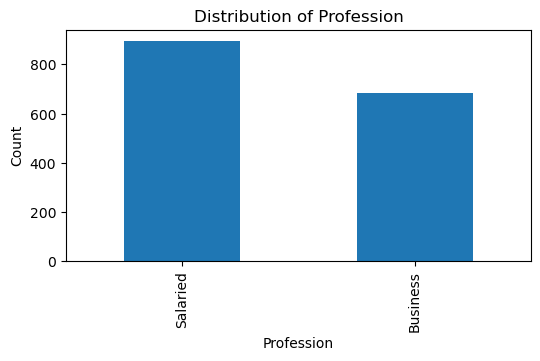

In [27]:
# Distribution of profession
plt.figure(figsize=(6, 3))
automobile_data['Profession'].value_counts().plot(kind='bar')
plt.title("Distribution of Profession")
plt.xlabel("Profession")
plt.ylabel("Count")    
plt.show()

#### Observation
The majority of customers are employed individuals, comprising approximately 60% of the dataset.

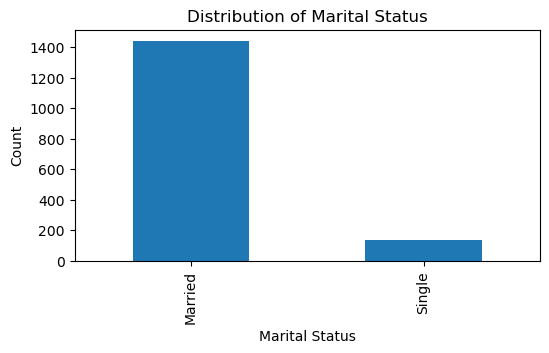

In [28]:
# Distribution of Marital Status
plt.figure(figsize=(6, 3))
automobile_data['Marital_status'].value_counts().plot(kind='bar')
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")    
plt.show()

#### Observation
Almost 90% of customers in the dataset are married.

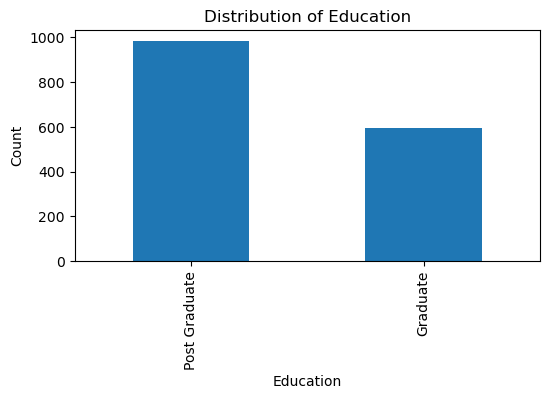

In [29]:
# Distribution of Education
plt.figure(figsize=(6, 3))
automobile_data['Education'].value_counts().plot(kind='bar')
plt.title("Distribution of Education")
plt.xlabel("Education")
plt.ylabel("Count")    
plt.show()

#### Observation
Every customer in the dataset holds either a graduate or postgraduate degree, with approximately 60% having completed postgraduate studies.

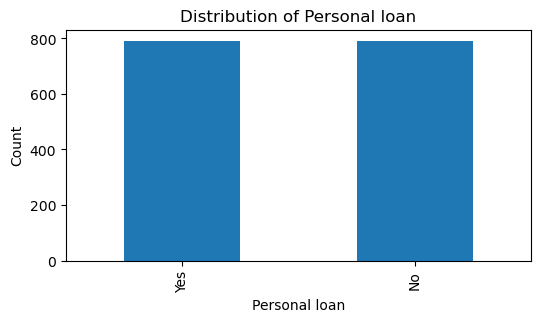

In [30]:
# Distribution of Personal loan
plt.figure(figsize=(6, 3))
automobile_data['Personal_loan'].value_counts().plot(kind='bar')
plt.title("Distribution of Personal loan")
plt.xlabel("Personal loan")
plt.ylabel("Count")    
plt.show()

#### Observation
In the dataset, the number of individuals who have taken a personal loan is equal to the number of those who have not.

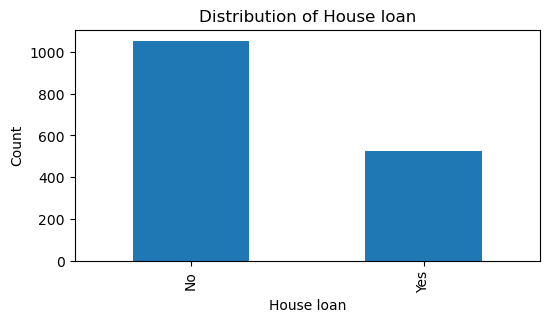

In [31]:
# Distribution of House loan
plt.figure(figsize=(6, 3))
automobile_data['House_loan'].value_counts().plot(kind='bar')
plt.title("Distribution of House loan")
plt.xlabel("House loan")
plt.ylabel("Count")    
plt.show()

#### Observation
Roughly two-thirds of customers do not carry any housing loan liability.

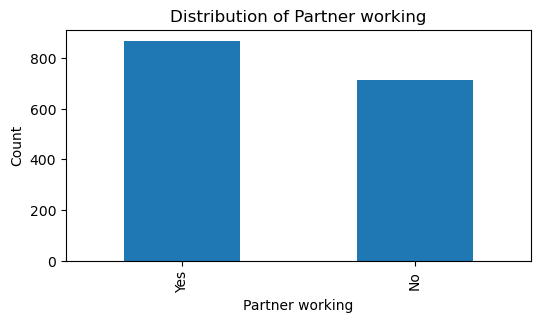

In [32]:
# Distribution of Partner working
plt.figure(figsize=(6, 3))
automobile_data['Partner_working'].value_counts().plot(kind='bar')
plt.title("Distribution of Partner working")
plt.xlabel("Partner working")
plt.ylabel("Count")    
plt.show()

#### Observation 
More than 50% of the customers have working partners.

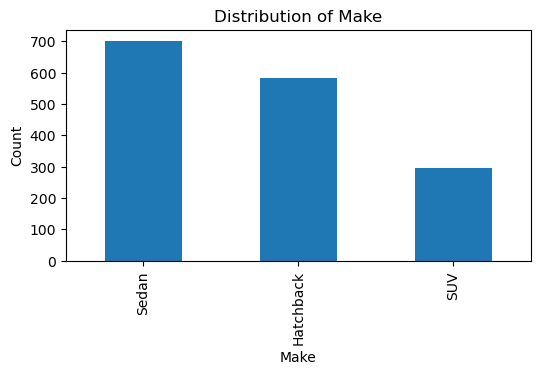

In [33]:
# Distribution of Make
plt.figure(figsize=(6, 3))
automobile_data['Make'].value_counts().plot(kind='bar')
plt.title("Distribution of Make")
plt.xlabel("Make")
plt.ylabel("Count")    
plt.show()

#### Observation
Sedans are the most preferred car types followed by hatchbacks while SUV's are the least preferred accounting for less than 20% in the dataset.

### Key Takeaways of Univariate Analysis
1. Over 50% of our car buyers are aged between 22 amd 30 with median value of around 29 and 75% aged below 38 which means that our cars are more applealing towards young car buyers.
2. Over 90% of the car buyers are married and over 75% are male.
3. Most preferred car make is sedans while SUV's are least preferred.

## Bivariate Analysis

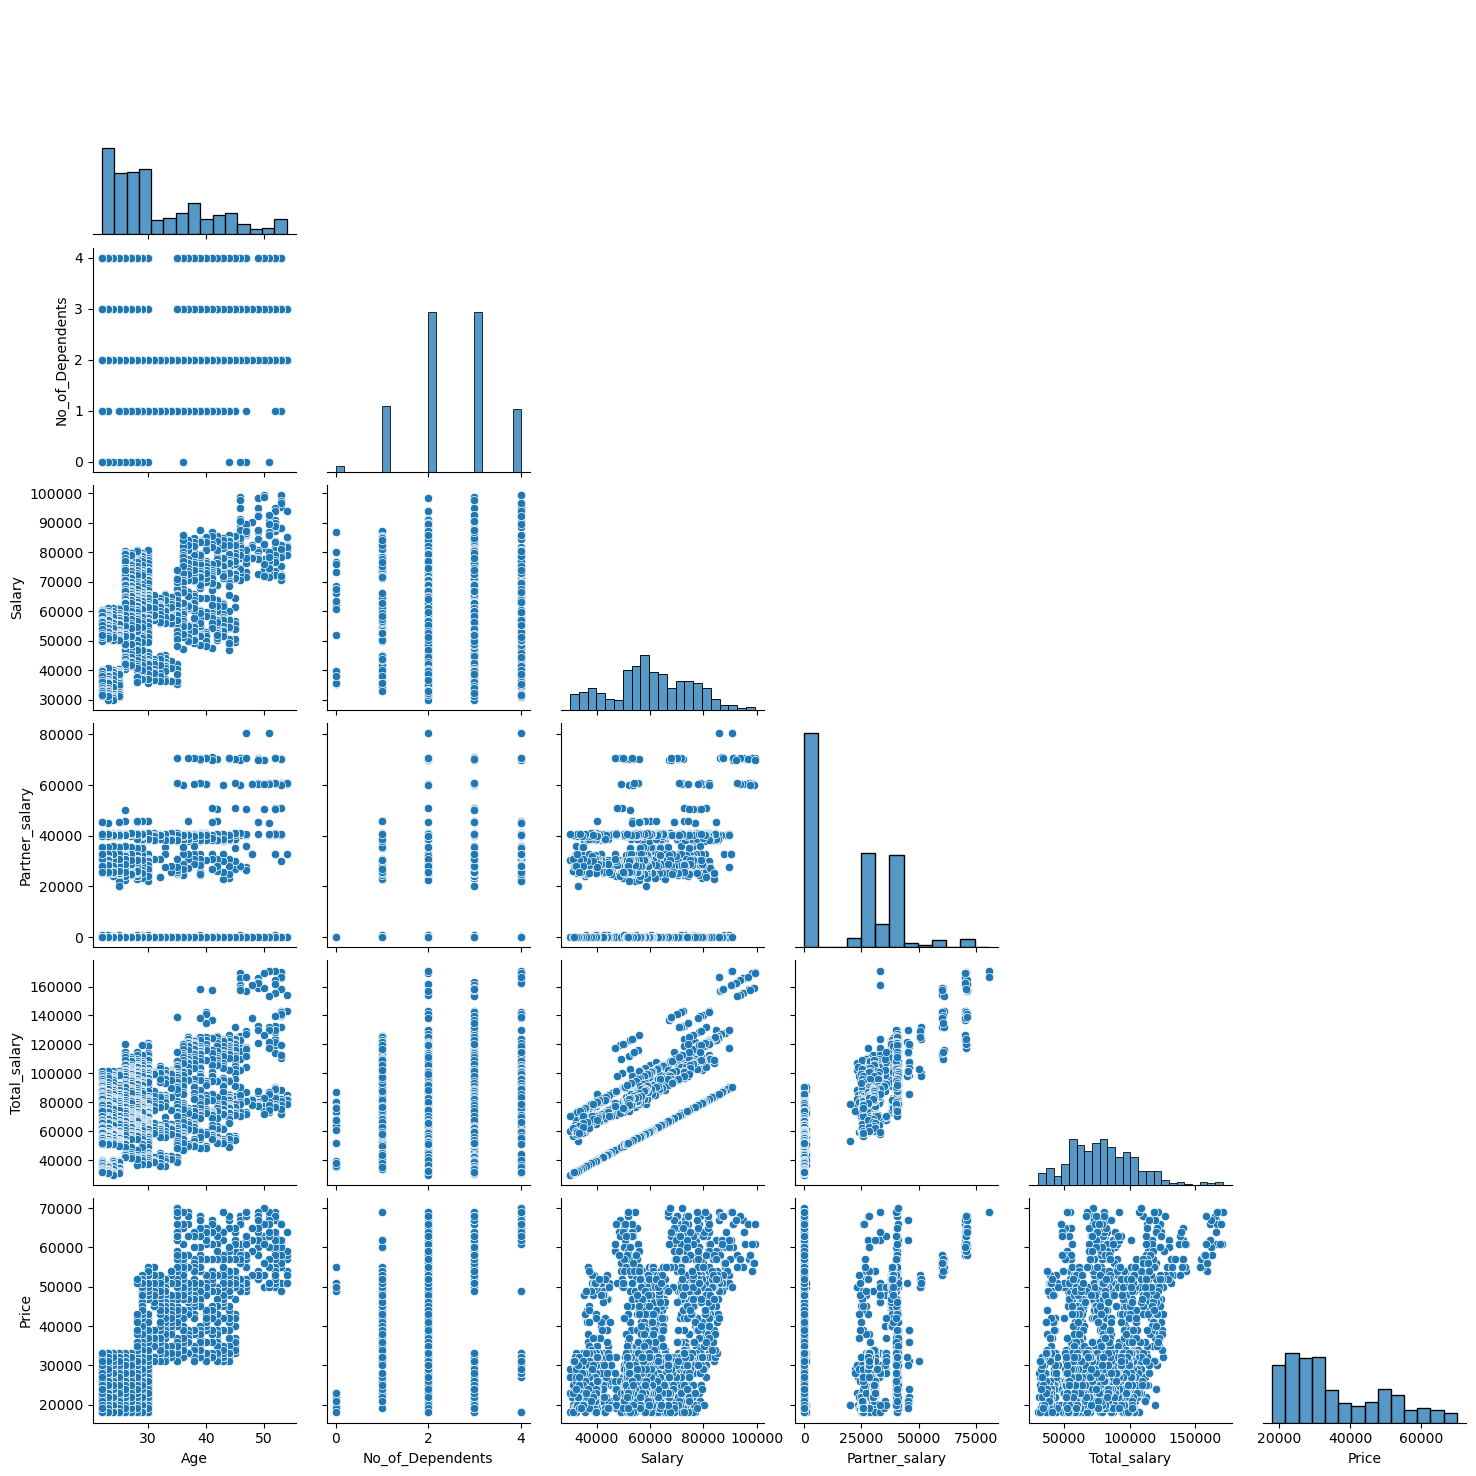

In [34]:
# pairplot
sns.pairplot(data = automobile_data, corner = True)
plt.show()

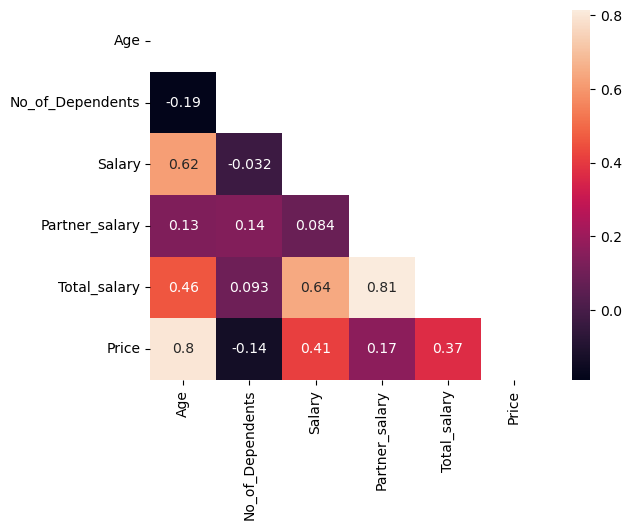

In [35]:
# Heatmap
mask = np.triu(np.ones_like(automobile_data.select_dtypes(include=['int64', 'float64']).corr(), dtype = 'bool'))
sns.heatmap(data = automobile_data.select_dtypes(include=['int64', 'float64']).corr(), annot = True, mask = mask)
plt.show()

#### Relationship between Total salary and Car price

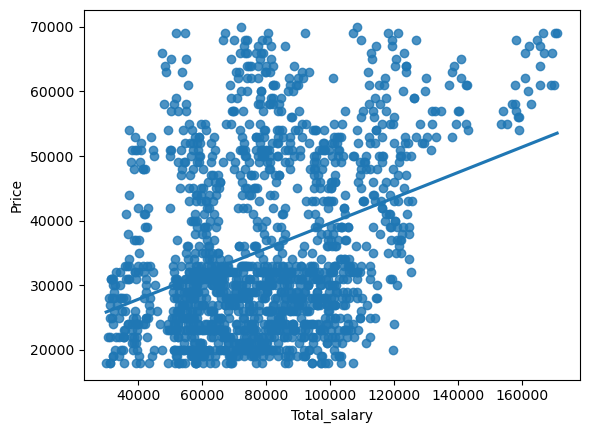

In [36]:
sns.regplot(data = automobile_data, x = 'Total_salary', y = 'Price', ci = False)
plt.show()

#### Observation
We have decided not to treat the outliers for Total_salary column as we have considered it a dependent column from which we might gather some additional information and from the above plot we can clearly interpret that as the income increases, customers purchase more expensive cars. 

Customers with a total income exceeding 140,000 are considered outliers. From the plot provided, it's apparent that these customers have purchased cars priced above 50,000, which falls into the higher price range for the company.

### Relationship between categorical and numeric data
In this section, our focus will primarily be on the "Price" and "Make" columns, as the outcomes of bivariate analysis using these two columns will directly align with our business objectives.

#### Understanding business dynamics

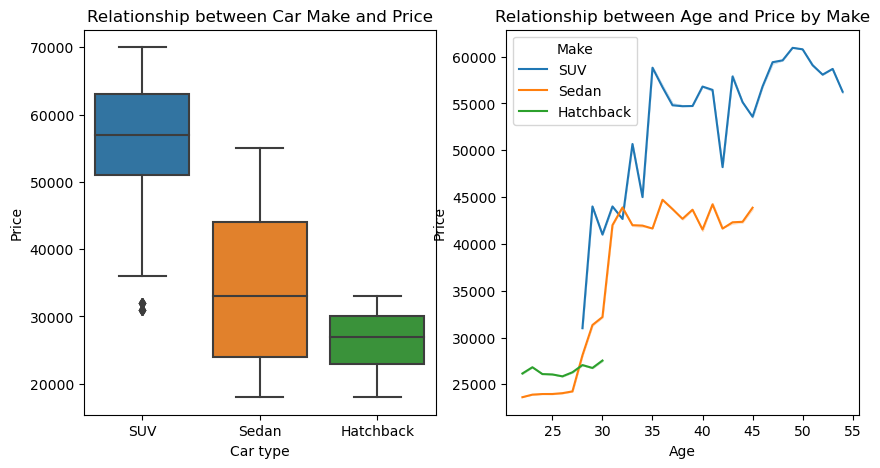

In [37]:
# Defining plot
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# Relationshhip of price and make
sns.boxplot(data = automobile_data, x = 'Make', y = 'Price', ax = axs[0])
axs[0].set_title('Relationship between Car Make and Price')
axs[0].set_xlabel('Car type')
axs[0].set_ylabel('Price')
# age and price bar plot hue make
sns.lineplot(data =automobile_data, x = 'Age', y = 'Price', hue = 'Make', ci = False, ax = axs[1])
axs[1].set_title('Relationship between Age and Price by Make')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Price')
plt.show()

#### Observation
1. SUV's are priced highest followed by sedans and hatchbacks.
2. Hatchbacks are preferred by younger people aged under 30 while sedans are preferred by those aged under 45 and SUV's by those aged above 30.
3. As age increases people tend to buy higher priced cars.

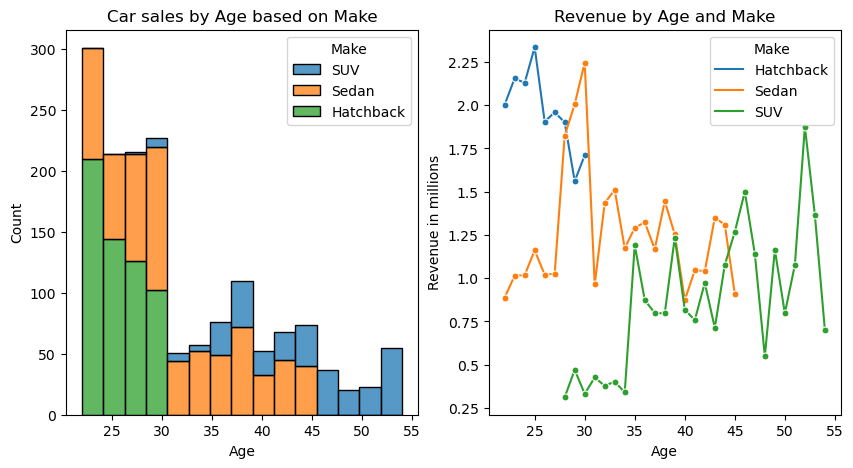

In [38]:
# Defining figure size
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# Car sales by age based on make
sns.histplot(data = automobile_data, x = 'Age', hue = 'Make', multiple = 'stack', ax=axs[0])
axs[0].set_title('Car sales by Age based on Make')
# Revenue by age
revenue_by_age = automobile_data.groupby(['Age','Make'])['Price'].sum().reset_index()
sns.lineplot(data = revenue_by_age, x = 'Age', y = 'Price', hue = 'Make',marker = '.',markersize =10, ax = axs[1])
axs[1].set_yticklabels(np.arange(0,2.5,.25))
axs[1].set_title('Revenue by Age and Make')
axs[1].set_ylabel('Revenue in millions')
plt.show()


#### Observations
Demographically, sedans exhibit the highest acceptance and most consistent performance in terms of both volume and revenue. Conversely, hatchbacks are favored by younger individuals, with preferences shifting towards larger vehicles such as SUVs as age increases.

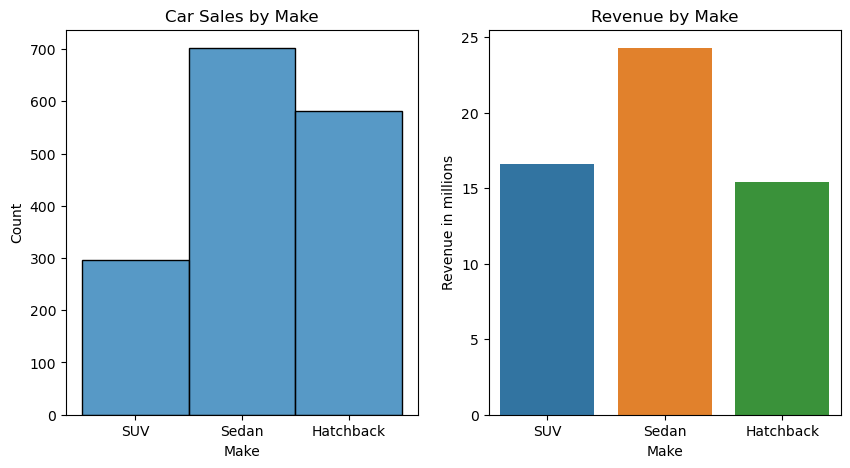

In [39]:
# Defining figure size
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
# car sales by make
sns.histplot(data = automobile_data, x = 'Make', ax = axs[0])
axs[0].set_title('Car Sales by Make')
# revenue by make
revenue_by_make = automobile_data.groupby(['Make'])['Price'].sum().reset_index()
order = ['SUV','Sedan','Hatchback']
sns.barplot(data = revenue_by_make, x = 'Make', y = 'Price',order = order, ax = axs[1])
axs[1].set_title('Revenue by Make')
axs[1].set_yticklabels(np.arange(0,30,5))
axs[1].set_ylabel('Revenue in millions')
plt.show()

#### Observation
1. Sales by revenue and volume are highest for sedans.
2. By volume hatchback sales are almost twice that of SUV's, however, since SUV's are higher priced the revenue generated by sales of SUV's is slightly higher than that from hatchbacks. 

#### Exploring answers for key business task questions

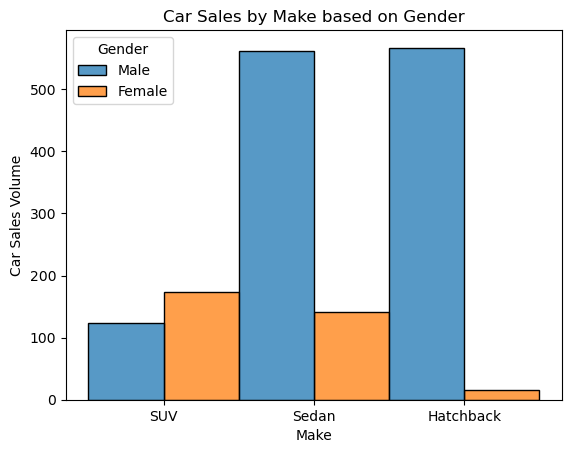

In [40]:
# car sales by make and gender
sns.histplot(data = automobile_data, x = 'Make', hue = 'Gender', multiple = 'dodge')
plt.title('Car Sales by Make based on Gender')
plt.ylabel('Car Sales Volume')
plt.show()

In [90]:
# average age of car purchase be gender
print('average age of car purchase be gender')
automobile_data.groupby(['Gender'])['Age'].mean()

average age of car purchase be gender


Gender
Female    39.525836
Male      29.924121
Name: Age, dtype: float64

In [92]:
# probability of buying different makes for salaried individuals
print('probability of buying different makes for salaried individuals')
automobile_data[automobile_data['Profession'] == 'Salaried']['Make'].value_counts(normalize = True)

probability of buying different makes for salaried individuals


Make
Sedan        0.441964
Hatchback    0.325893
SUV          0.232143
Name: proportion, dtype: float64

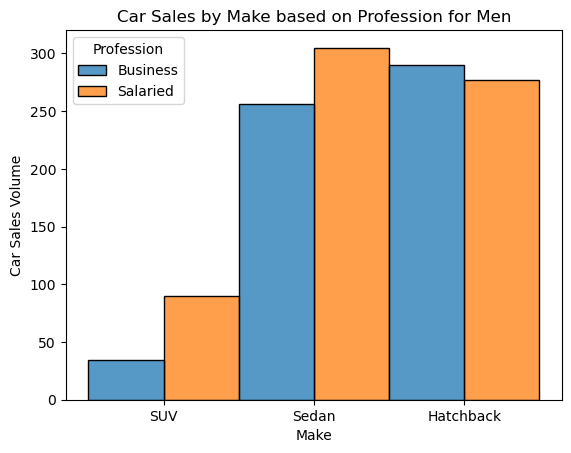

In [94]:
# car sales by make and profession
sns.histplot(data = automobile_data[automobile_data['Gender'] == 'Male'], x = 'Make', hue = 'Profession', multiple = 'dodge')
plt.title('Car Sales by Make based on Profession for Men')
plt.ylabel('Car Sales Volume')
plt.show()

In [43]:
automobile_data.groupby('Gender')['Price'].mean()

Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64

In [44]:
# Amount spent on purchasing cars for individuals who have personal loan
automobile_data[automobile_data['Personal_loan'] == 'Yes']['Price'].mean()

34457.07070707071

In [98]:
# Amount spent on purchasing cars for individuals who have personal loan 
print('Average amount spent on purchasing cars for individuals who have personal loan')
automobile_data.groupby('Personal_loan')['Price'].mean()

Average amount spent on purchasing cars for individuals who have personal loan


Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64

In [97]:
# Amount spent on purchasing cars for individuals who have personal loan 
print('Amount spent on purchasing cars for individuals who have personal loan')
automobile_data.groupby('Personal_loan')['Price'].sum()

Amount spent on purchasing cars for individuals who have personal loan


Personal_loan
No     28990000
Yes    27290000
Name: Price, dtype: int64

[]

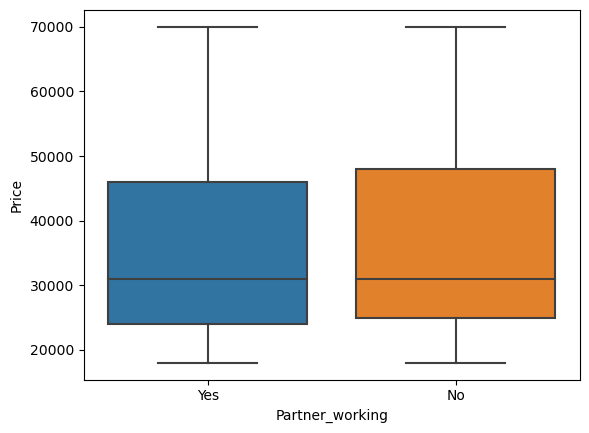

In [100]:
# Effect of working partner on car price
sns.boxplot(data = automobile_data, x = 'Partner_working', y = 'Price')
plt.plot()

In [102]:
# statistical summary of car price based on working partner
print('statistical summary of car price based on working partner')
automobile_data.groupby('Partner_working')['Price'].describe()

statistical summary of car price based on working partner


,count,mean,std,min,25%,50%,75%,max
Partner_working,,,,,,,,
No,713.0,36000.000000,13817.734086,18000.0,25000.0,31000.0,48000.0,70000.0
Yes,868.0,35267.281106,13479.532555,18000.0,24000.0,31000.0,46000.0,70000.0


# Problem 2

## Problem Statement
Godigt Bank is facing high credit card attrition, necessitating the identification of key variables to comprehend the underlying causes and subsequently reduce attrition. 

## Data Description
Dataset contains multiple attributes related to credit card holder

## Dataset Used
godigt_cc_data.xlsx

## Domain
BFSI

## Attribute Information
* userid - Unique bank customer-id
* card_no - Masked credit card number
* card_bin_no - Credit card IIN number
* Issuer - Card network issuer
* card_type - Credit card type
* card_source_data - Credit card sourcing date
* high_networth - Customer category based on their net-worth value (A: High to E: Low)
* active_30 - Savings/Current/Salary etc. account activity in last 30 days
* active_60 - Savings/Current/Salary etc. account activity in last 60 days
* active_90 - Savings/Current/Salary etc. account activity in last 90 days
* cc_active30 - Credit Card activity in the last 30 days
* cc_active60 - Credit Card activity in the last 60 days
* cc_active90 - Credit Card activity in the last 90 days
* hotlist_flag - Whether card is hot-listed(Any problem noted on the card)
* widget_products - Number of convenience products customer holds (dc, cc, net-banking active, mobile banking active, wallet active, etc.)
* engagement_products - Number of investment/loan products the customer holds (FD, RD, Personal loan, auto loan)
* annual_income_at_source - Annual income recorded in the credit card application
* other_bank_cc_holding - Whether the customer holds another bank credit card
* bank_vintage - Vintage with the bank (in months) as on Tthmonth
* T+1_month_activity - Whether customer uses credit card in T+1 month (future)
* T+2_month_activity - Whether customer uses credit card in T+2 month (future)
* T+3_month_activity - Whether customer uses credit card in T+3 month (future)
* T+6_month_activity - Whether customer uses credit card in T+6 month (future)
* T+12_month_activity - Whether customer uses credit card in T+12 month (future)
* Transactor_revolver - Revolver: Customer who carries balances over from one month to the next. Transactor: Customer who pays off their balances in full every month.
* avg_spends_l3m - Average credit card spends in last 3 months
* Occupation_at_source - Occupation recorded at the time of credit card application
* cc_limit - Current credit card limit

## Loading Data

In [48]:
# loading csv file
cc_data = pd.read_excel("D:/Kartik/GL MDS/Study_data/Assingnment_files/Module_2_SMDM/godigt_cc_data.xlsx")

## Describe Data

In [49]:
# Taking a glimpse of data
cc_data.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [50]:
# Information about dataset
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

#### Observations
1. Dataset has 28 columns and 8448 rows.
2. There are 19 numeric, 8 object type and 1 datetime column in the dataset.
3. Transactor_revolver column has some missing values

In [51]:
# statistical summary of dataset
cc_data.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
userid,8448.0,NaN,NaN,NaN,4224.5,1.0,2112.75,4224.5,6336.25,8448.0,2438.87187
card_no,8448,11,4262 41XX XXXX XXXX,2084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_bin_no,8448.0,NaN,NaN,NaN,436747.044508,376916.0,426241.0,437551.0,438439.0,524178.0,30489.752417
Issuer,8448,3,Visa,7279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_type,8448,15,rewards,1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_source_date,8448,NaN,NaN,NaN,2009-06-19 13:35:17.045454592,1998-07-24 00:00:00,2004-01-07 18:00:00,2009-05-24 12:00:00,2014-11-27 06:00:00,2020-06-17 00:00:00,NaN
high_networth,8448,5,A,1740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_30,8448.0,NaN,NaN,NaN,0.292377,0.0,0.0,0.0,1.0,1.0,0.454881
active_60,8448.0,NaN,NaN,NaN,0.494792,0.0,0.0,0.0,1.0,1.0,0.500002
active_90,8448.0,NaN,NaN,NaN,0.642045,0.0,0.0,1.0,1.0,1.0,0.479427


In [52]:
cc_data.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [53]:
cc_data.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
userid,8448.0,NaN,NaN,NaN,4224.5,1.0,2112.75,4224.5,6336.25,8448.0,2438.87187
card_no,8448,11,4262 41XX XXXX XXXX,2084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_bin_no,8448.0,NaN,NaN,NaN,436747.044508,376916.0,426241.0,437551.0,438439.0,524178.0,30489.752417
Issuer,8448,3,Visa,7279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_type,8448,15,rewards,1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_source_date,8448,NaN,NaN,NaN,2009-06-19 13:35:17.045454592,1998-07-24 00:00:00,2004-01-07 18:00:00,2009-05-24 12:00:00,2014-11-27 06:00:00,2020-06-17 00:00:00,NaN
high_networth,8448,5,A,1740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_30,8448.0,NaN,NaN,NaN,0.292377,0.0,0.0,0.0,1.0,1.0,0.454881
active_60,8448.0,NaN,NaN,NaN,0.494792,0.0,0.0,0.0,1.0,1.0,0.500002
active_90,8448.0,NaN,NaN,NaN,0.642045,0.0,0.0,1.0,1.0,1.0,0.479427


Columns active_x, cc_activex and T+x_month_activity are numeric type, however, they are categorical in nature.

## Pre-processing data

### Checking for duplicates

In [54]:
print(f'number of duplicate rows in dataset = {cc_data.duplicated().sum()}')

number of duplicate rows in dataset = 0


### Removing irrelevant columns

In [55]:
# dropping columns
cc_data.drop(['userid','card_no','card_bin_no'], axis = 1, inplace = True)

In [56]:
# checking shape of dataframe
cc_data.shape

(8448, 25)

### Missing value treatment

In [57]:
# checking for missing values
cc_data.isnull().sum()

Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [58]:
# checking for unique values in Transactor_revolver column
cc_data['Transactor_revolver'].unique()

array(['T', 'R', nan], dtype=object)

Transactor_revolver contains 'T' and 'R' as unique values, as per the statistical summary we know that mode value is 'T' so we will impute missing values with mode values.

In [59]:
# imputing missing values
cc_data['Transactor_revolver'] = cc_data['Transactor_revolver'].replace(np.nan, 'T')

In [60]:
# checking for unique values in Transactor_revolver column
cc_data['Transactor_revolver'].unique()

array(['T', 'R'], dtype=object)

In [61]:
# checking for missing values
cc_data.isnull().sum()

Issuer                     0
card_type                  0
card_source_date           0
high_networth              0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
hotlist_flag               0
widget_products            0
engagement_products        0
annual_income_at_source    0
other_bank_cc_holding      0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
Transactor_revolver        0
avg_spends_l3m             0
Occupation_at_source       0
cc_limit                   0
dtype: int64

### Converting categorical columns to object

In [62]:
# converting categorical columns with numeric datatype to object type.
for column in cc_data.columns:
    if cc_data[column].dtype == 'int64'and cc_data[column].isin([0, 1]).all():
        cc_data[column] = cc_data[column].astype('object')       

In [63]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Issuer                   8448 non-null   object        
 1   card_type                8448 non-null   object        
 2   card_source_date         8448 non-null   datetime64[ns]
 3   high_networth            8448 non-null   object        
 4   active_30                8448 non-null   object        
 5   active_60                8448 non-null   object        
 6   active_90                8448 non-null   object        
 7   cc_active30              8448 non-null   object        
 8   cc_active60              8448 non-null   object        
 9   cc_active90              8448 non-null   object        
 10  hotlist_flag             8448 non-null   object        
 11  widget_products          8448 non-null   int64         
 12  engagement_products      8448 non-

## Exploratory Data Analysis (EDA)
### Univariate Analysis

Distribution of widget_products


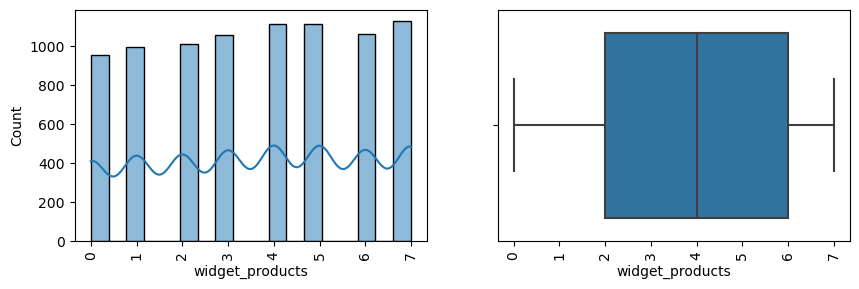

Distribution of engagement_products


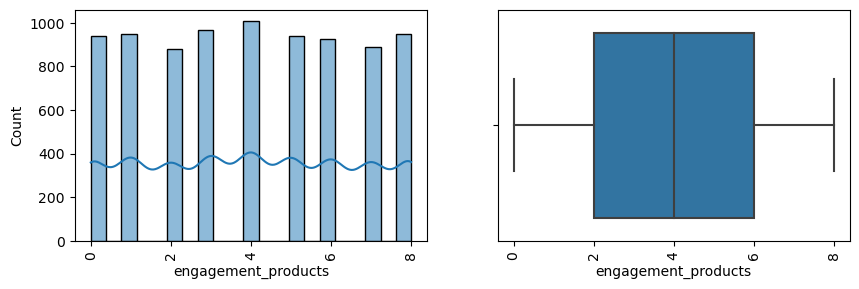

Distribution of annual_income_at_source


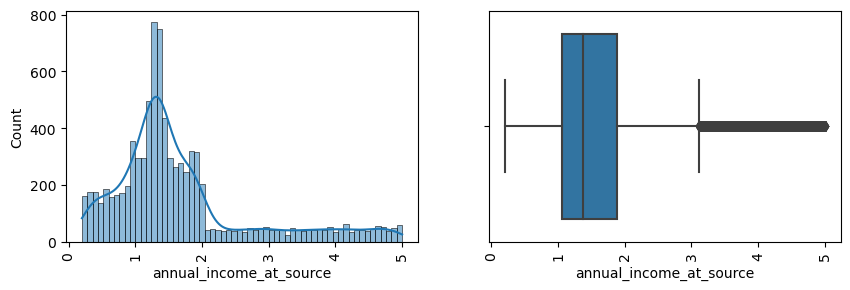

Distribution of bank_vintage


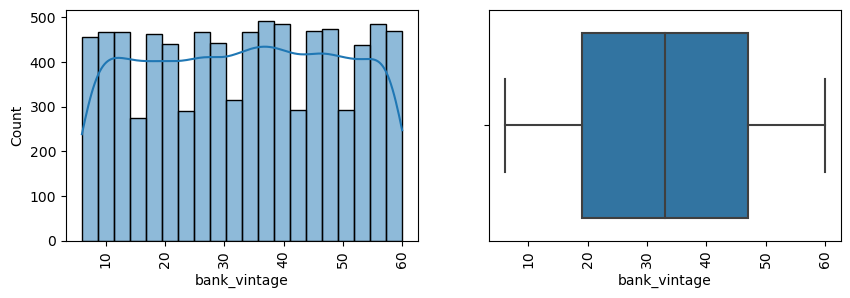

Distribution of avg_spends_l3m


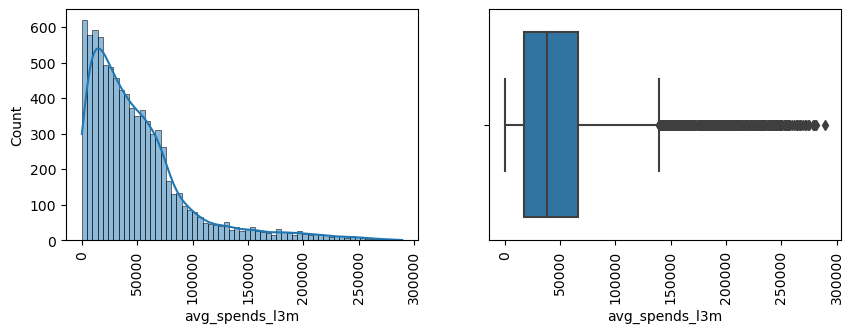

Distribution of cc_limit


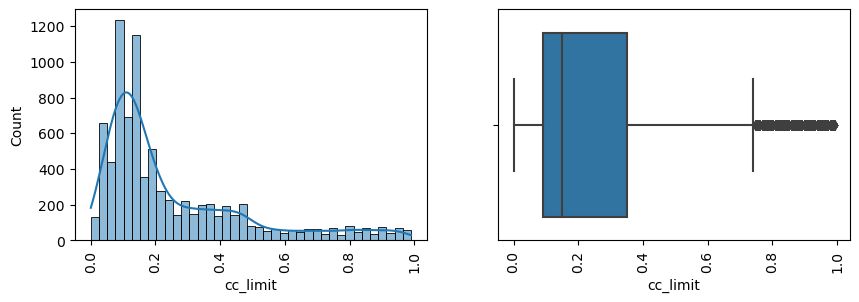

In [64]:
# Data distribution for all numeric columns
for column in cc_data.columns:
    if cc_data[column].dtype == 'int64':
        print(f'Distribution of {column}')
        fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
        sns.histplot(cc_data[column], kde=True, ax=axs[0])
        axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
        sns.boxplot(x=column ,data=cc_data, ax=axs[1])
        axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
        plt.show()

#### Observations
Based on the above plots we can conclude that amongst numeric columns, 'annual_income_at_source', 'avg_spend_l3m' and 'cc_limit' have outliers and all of them are right skewed.

Distribution of Issuer


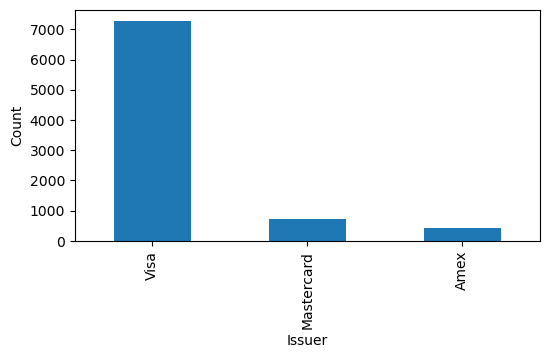

Distribution of card_type


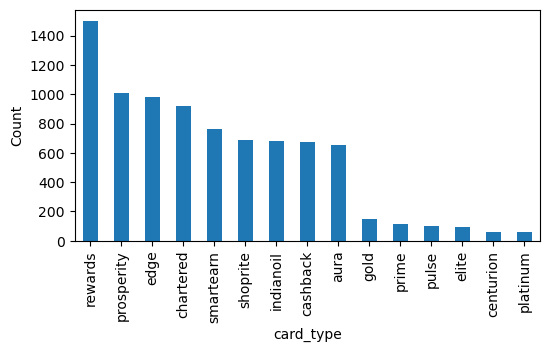

Distribution of high_networth


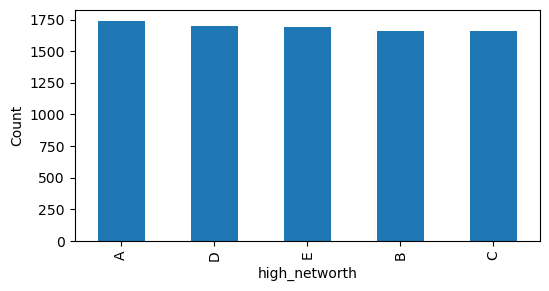

Distribution of active_30


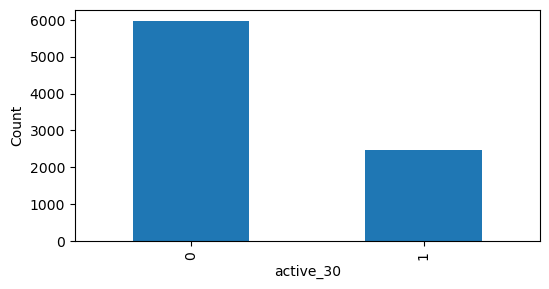

Distribution of active_60


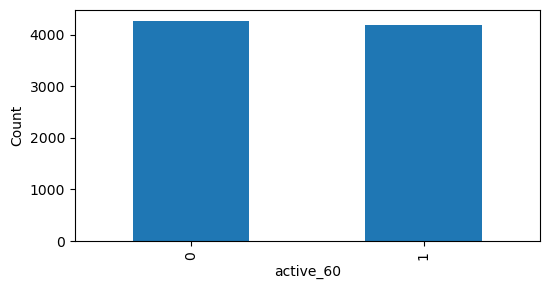

Distribution of active_90


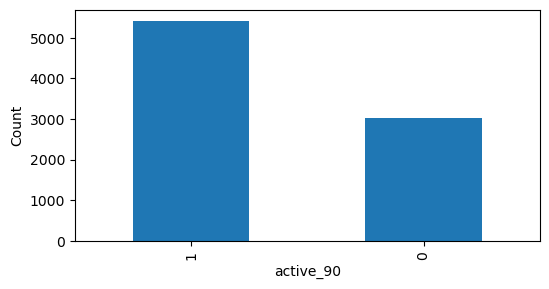

Distribution of cc_active30


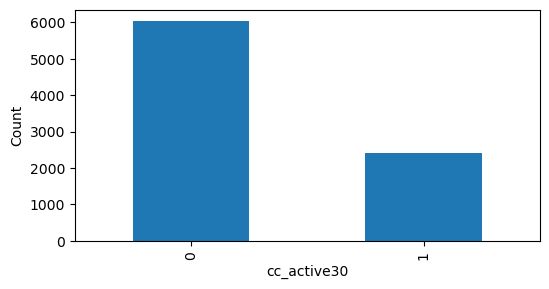

Distribution of cc_active60


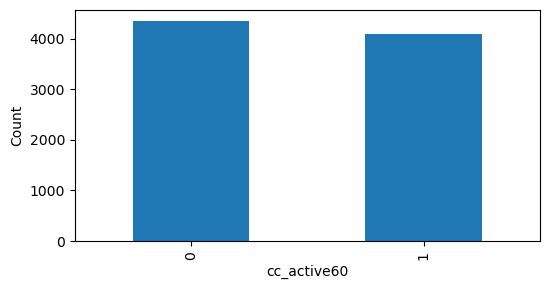

Distribution of cc_active90


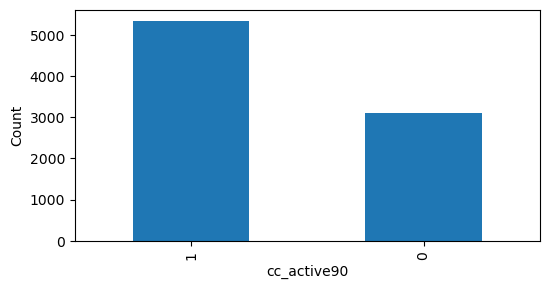

Distribution of hotlist_flag


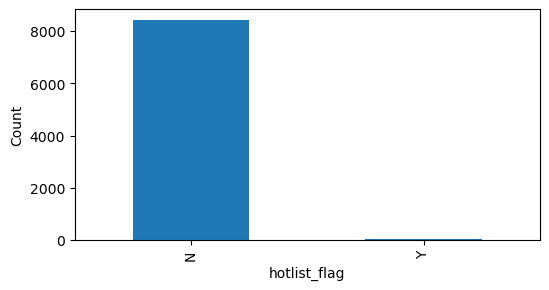

Distribution of other_bank_cc_holding


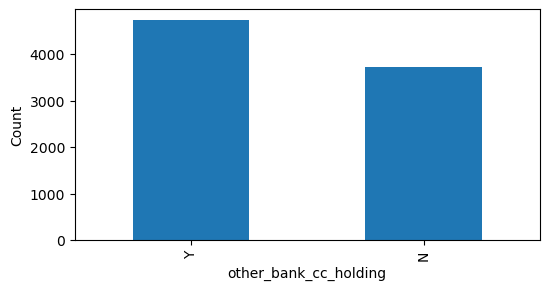

Distribution of T+1_month_activity


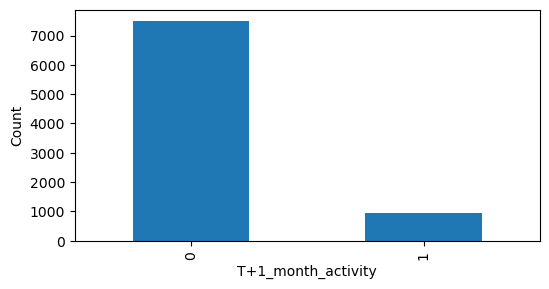

Distribution of T+2_month_activity


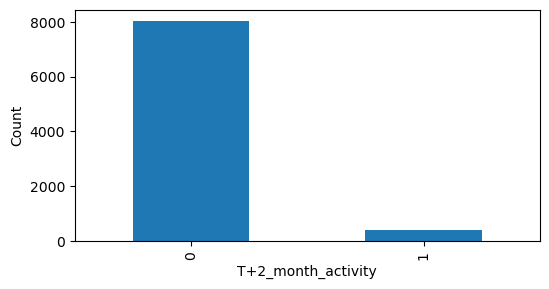

Distribution of T+3_month_activity


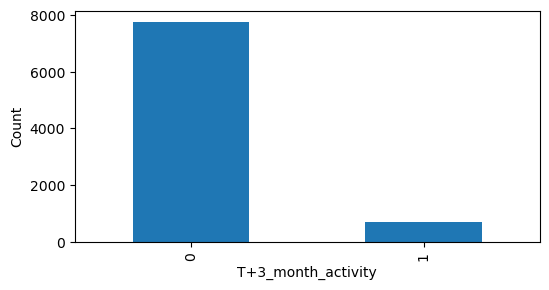

Distribution of T+6_month_activity


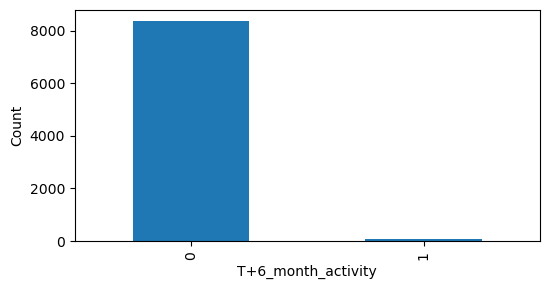

Distribution of T+12_month_activity


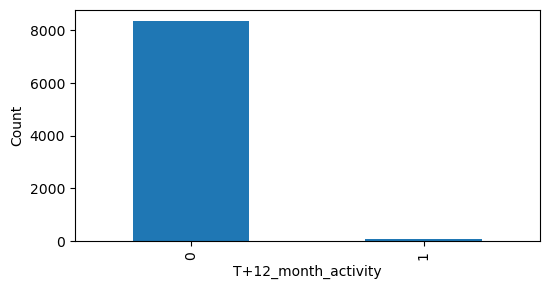

Distribution of Transactor_revolver


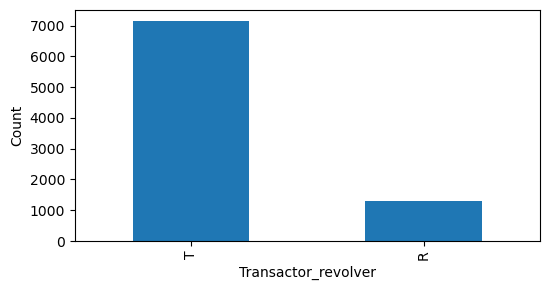

Distribution of Occupation_at_source


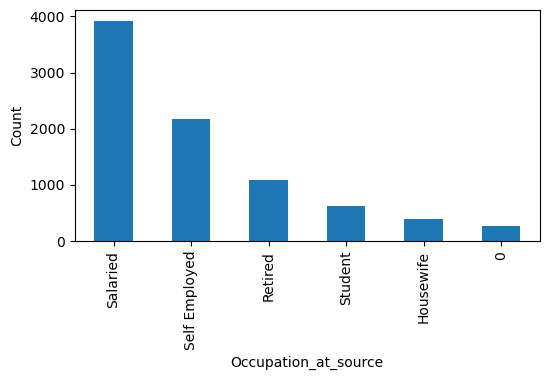

In [65]:
# Data distribution for all categorical columns
for column in cc_data.columns:
    if cc_data[column].dtype == 'object':
        print(f'Distribution of {column}')
        plt.figure(figsize=(6, 3))
        cc_data[column].value_counts().plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel("Count")    
        plt.show()

#### Observations
1. Based on the distribution plots of categorical variables presented above, it's evident that there has been a consistent decrease in credit card operations over the last 90 days. This reduction extends beyond credit cards and is mirrored in the activities within customers' bank accounts to a similar extent. To gain a deeper understanding of this correlation, we will create side-by-side plots to visualize these trends.
2. Occupation_at_source column has some rows with 0 value, we would consider that for some cases occupation is not known and that is why 0 or null value is applied, so we will replace 0 with 'Unknown'. 

#### Replacing bad data

In [66]:
# change 0 to unknown
cc_data['Occupation_at_source'] = np.where(cc_data['Occupation_at_source'] == 0, 'Unknown', cc_data['Occupation_at_source'])

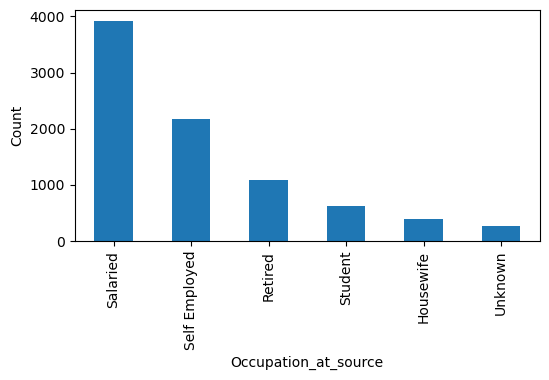

In [67]:
plt.figure(figsize=(6, 3))
cc_data['Occupation_at_source'].value_counts().plot(kind='bar')
plt.xlabel('Occupation_at_source')
plt.ylabel("Count")    
plt.show()

#### Analyzing trends

Activity in last 90 days


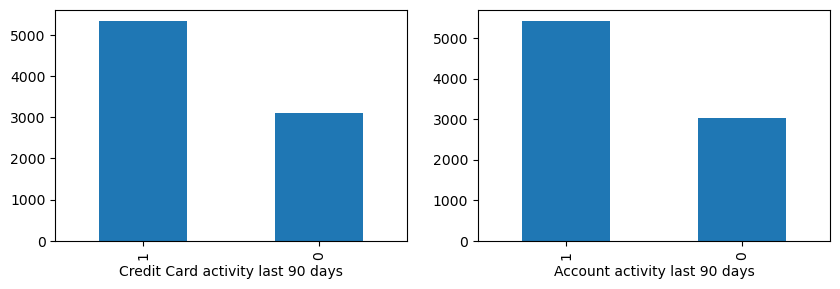

In [68]:
# Activity in last 90 days
print(f'Activity in last 90 days')
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
cc_data['cc_active90'].value_counts().plot(kind='bar', ax = axs[0])
axs[0].set_xlabel('Credit Card activity last 90 days')
cc_data['active_90'].value_counts().plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Account activity last 90 days')
plt.show()

Activity in last 60 days


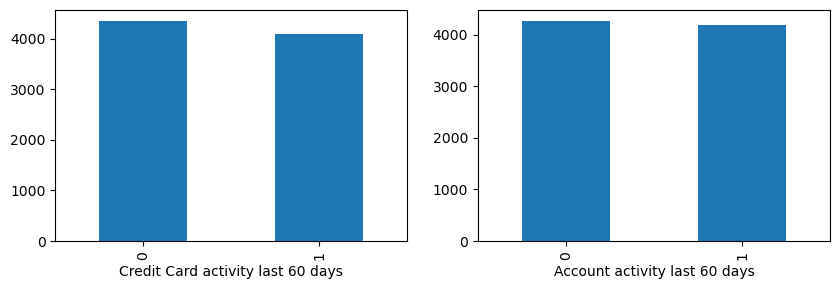

In [69]:
# Activity in last 60 days
print(f'Activity in last 60 days')
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
cc_data['cc_active60'].value_counts().plot(kind='bar', ax = axs[0])
axs[0].set_xlabel('Credit Card activity last 60 days')
cc_data['active_60'].value_counts().plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Account activity last 60 days')
plt.show()

Activity in last 30 days


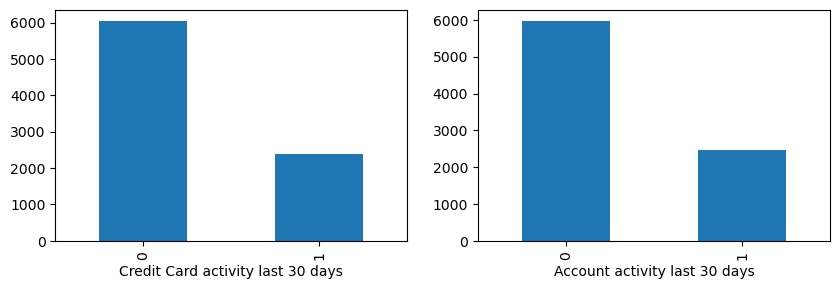

In [70]:
# Activity in last 30 days
print(f'Activity in last 30 days')
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))
cc_data['cc_active30'].value_counts().plot(kind='bar', ax = axs[0])
axs[0].set_xlabel('Credit Card activity last 30 days')
cc_data['active_30'].value_counts().plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Account activity last 30 days')
plt.show()

#### Observation
From the preceding plots, it's clear that the decline in credit card usage is mirrored with decrease in account activity. This observation prompts the question: could it be that overall customer interaction with the bank is diminishing?

Moving further we try to figure out the same.

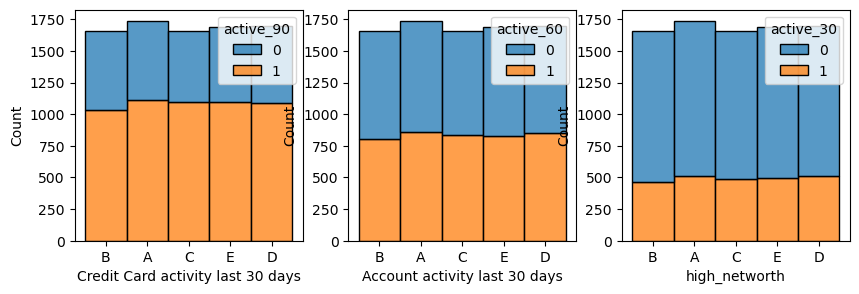

In [71]:
# Behavior of customers based on networth
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'high_networth', hue = 'active_90', multiple = 'stack', ax = axs[0])
axs[0].set_xlabel('Credit Card activity last 30 days')
sns.histplot(data = cc_data, x = 'high_networth', hue = 'active_60', multiple = 'stack', ax = axs[1])
axs[1].set_xlabel('Account activity last 30 days')
sns.histplot(data = cc_data, x = 'high_networth', hue = 'active_30', multiple = 'stack', ax = axs[2])
plt.show()

<Axes: xlabel='widget_products', ylabel='Count'>

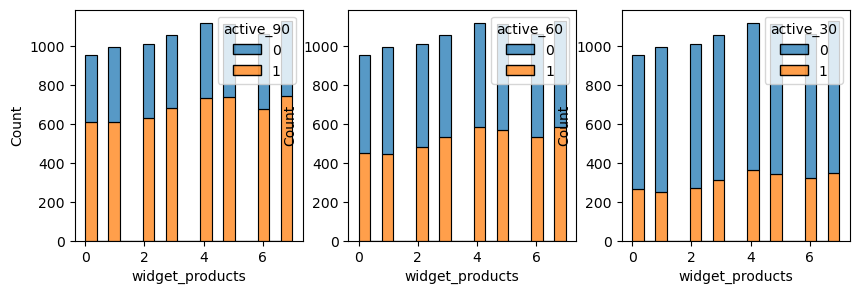

In [72]:
# Based on widget products
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'widget_products', hue = 'active_90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'widget_products', hue = 'active_60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'widget_products', hue = 'active_30', multiple = 'stack', ax = axs[2])

<Axes: xlabel='engagement_products', ylabel='Count'>

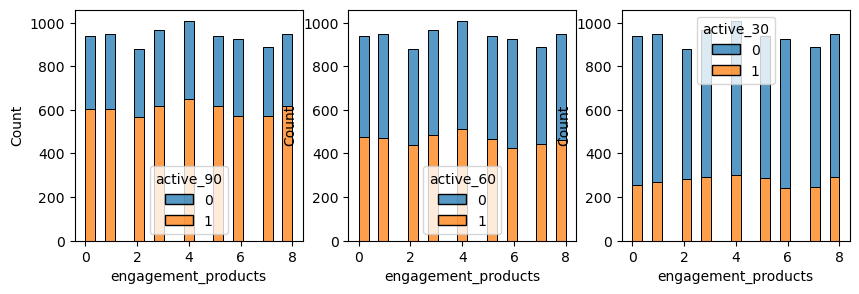

In [73]:
# based on engagement products
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'engagement_products', hue = 'active_90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'engagement_products', hue = 'active_60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'engagement_products', hue = 'active_30', multiple = 'stack', ax = axs[2])

<Axes: xlabel='bank_vintage', ylabel='Count'>

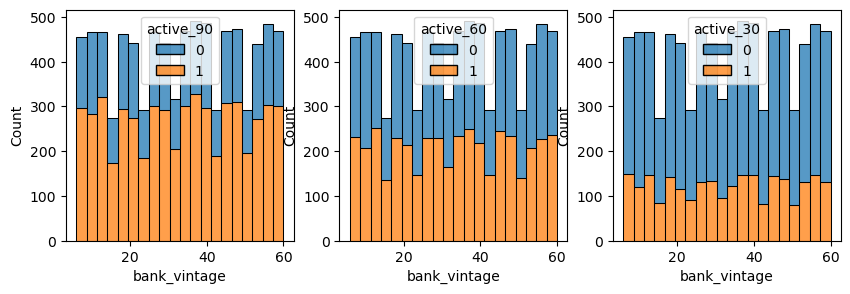

In [74]:
# based on bank vintage
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'bank_vintage', hue = 'active_90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'bank_vintage', hue = 'active_60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'bank_vintage', hue = 'active_30', multiple = 'stack', ax = axs[2])

#### Observations
No meaningful relationship based on banking information has been found to suggest that attrition in credit card usage is linked to broader banking activities. It's possible that the factors influencing credit card attrition are specific to credit card usage itself. Moving forward, we will explore this aspect further.

Credit card activity based on credit limit


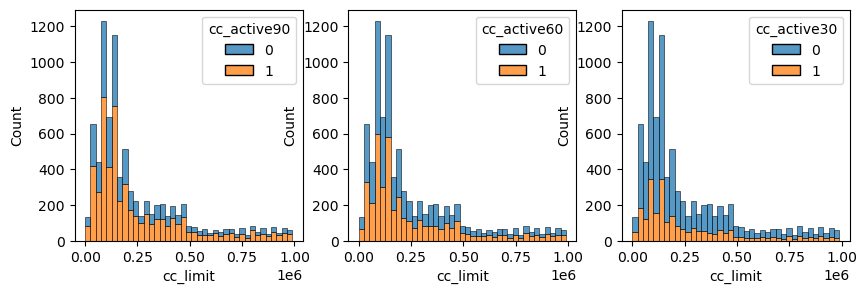

In [75]:
# based on credit limit
print('Credit card activity based on credit limit')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'cc_limit', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'cc_limit', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'cc_limit', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
plt.show()

Credit card activity based on Issuer


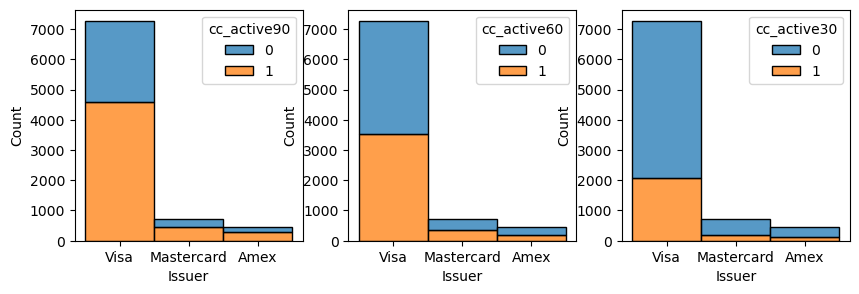

In [76]:
# based on card issuer
print('Credit card activity based on Issuer')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'Issuer', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'Issuer', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'Issuer', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
plt.show()

Credit card activity based on card type


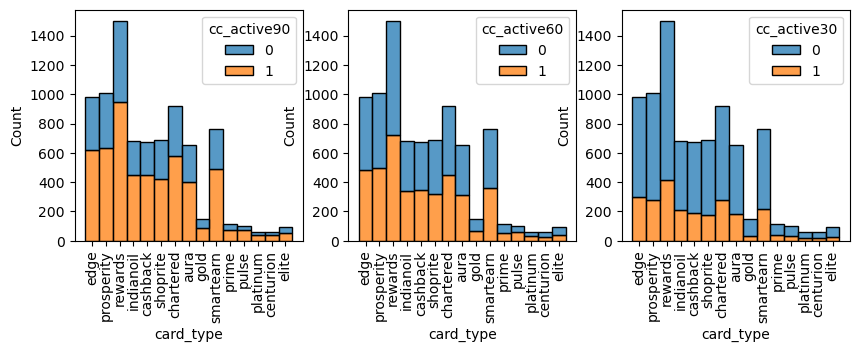

In [77]:
# based on card type
print('Credit card activity based on card type')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'card_type', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.histplot(data = cc_data, x = 'card_type', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
sns.histplot(data = cc_data, x = 'card_type', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
plt.show()

Credit card activity by annual income


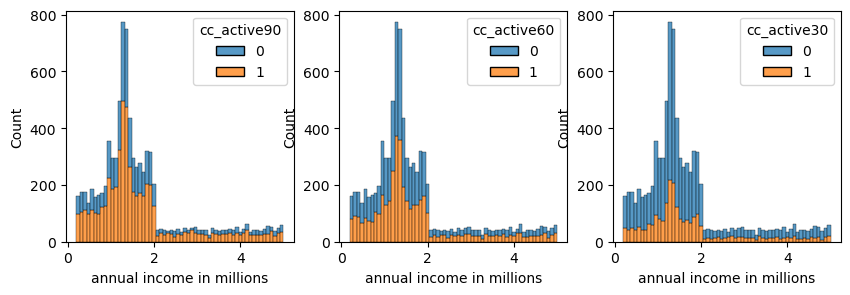

In [78]:
# based on annual income
print('Credit card activity by annual income')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'annual_income_at_source', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
axs[0].set_xticklabels(np.arange(-2,6,2))
axs[0].set_xlabel('annual income in millions')
sns.histplot(data = cc_data, x = 'annual_income_at_source', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
axs[1].set_xticklabels(np.arange(-2,6,2))
axs[1].set_xlabel('annual income in millions')
sns.histplot(data = cc_data, x = 'annual_income_at_source', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
axs[2].set_xticklabels(np.arange(-2,6,2))
axs[2].set_xlabel('annual income in millions')
plt.show()

Credit card activity by holding other bank credit card


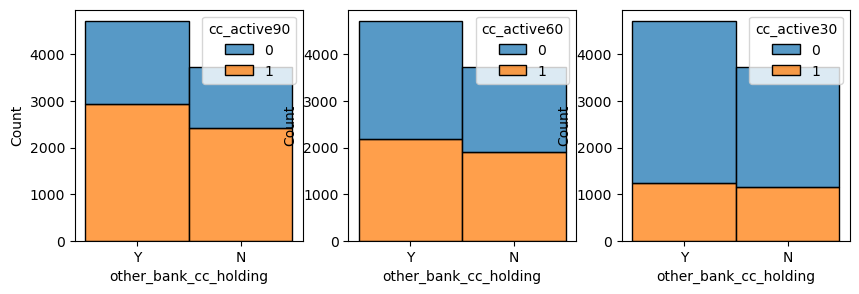

In [79]:
# based on other bank credit card holding
print('Credit card activity by holding other bank credit card')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'other_bank_cc_holding', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'other_bank_cc_holding', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'other_bank_cc_holding', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
plt.show()

Credit card activity by credit card bill payment


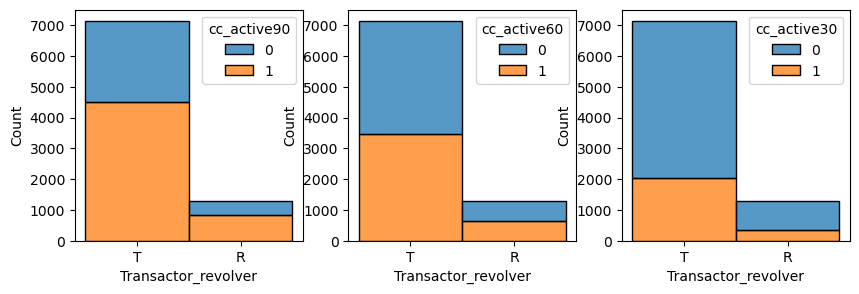

In [80]:
# based on credit card bill payment
print('Credit card activity by credit card bill payment')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'Transactor_revolver', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'Transactor_revolver', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'Transactor_revolver', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
plt.show()

Credit card activity by last 3 months average spend


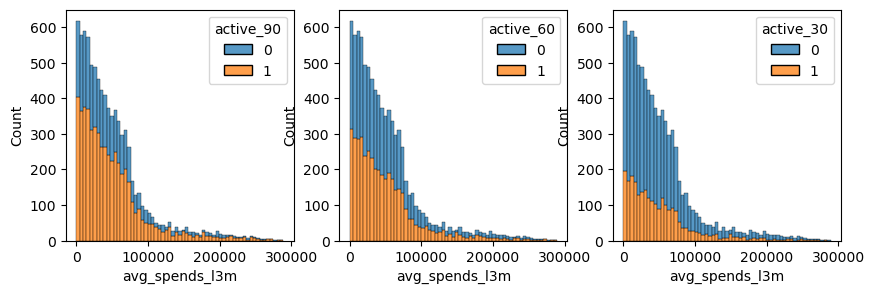

In [81]:
# by last m months average spending
print('Credit card activity by last 3 months average spend')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'avg_spends_l3m', hue = 'active_90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'avg_spends_l3m', hue = 'active_60', multiple = 'stack', ax = axs[1])
sns.histplot(data = cc_data, x = 'avg_spends_l3m', hue = 'active_30', multiple = 'stack', ax = axs[2])
plt.show()

Credit card activity based on occupation


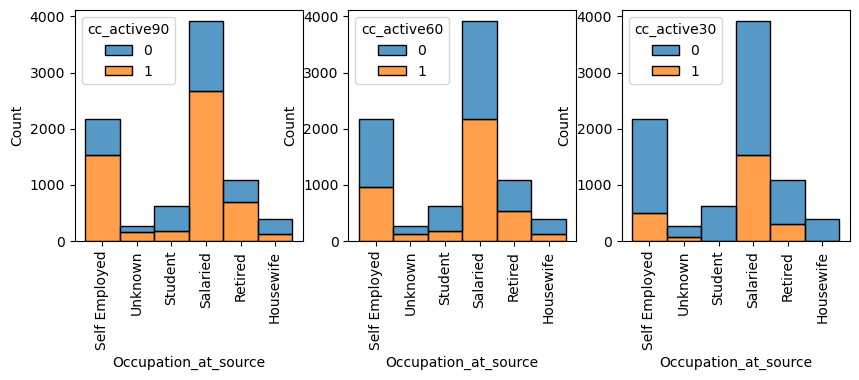

In [82]:
# Credit card activity based on occupation
print('Credit card activity based on occupation')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'Occupation_at_source', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.histplot(data = cc_data, x = 'Occupation_at_source', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
sns.histplot(data = cc_data, x = 'Occupation_at_source', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
plt.show()

#### Observation
The plot above indicates that occupation is influencing credit card activity, with the degree of attrition varying across different occupations.

credit card activity by engagement products


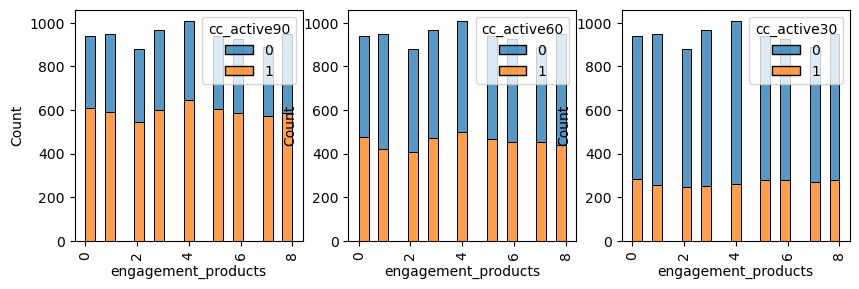

In [83]:
# based on engagement products
print('credit card activity by engagement products')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'engagement_products', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.histplot(data = cc_data, x = 'engagement_products', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
sns.histplot(data = cc_data, x = 'engagement_products', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
plt.show()

Credit card activity by widget products


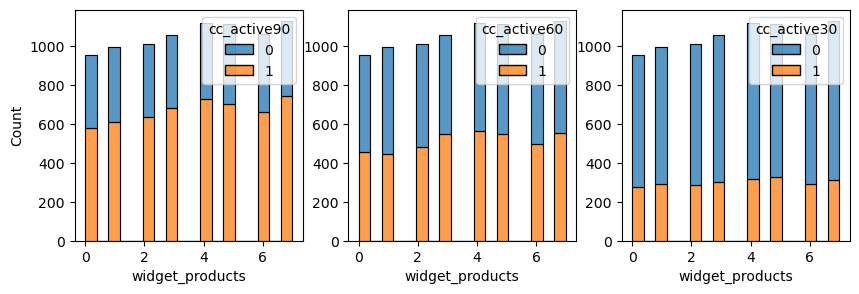

In [84]:
# based on widget_products
print('Credit card activity by widget products')
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(10,3))
sns.histplot(data = cc_data, x = 'widget_products', hue = 'cc_active90', multiple = 'stack', ax = axs[0])
sns.histplot(data = cc_data, x = 'widget_products', hue = 'cc_active60', multiple = 'stack', ax = axs[1])
axs[1].set_ylabel('')
sns.histplot(data = cc_data, x = 'widget_products', hue = 'cc_active30', multiple = 'stack', ax = axs[2])
axs[2].set_ylabel('')
plt.show()

boxplot for credit card limit by credit card activity and occupation


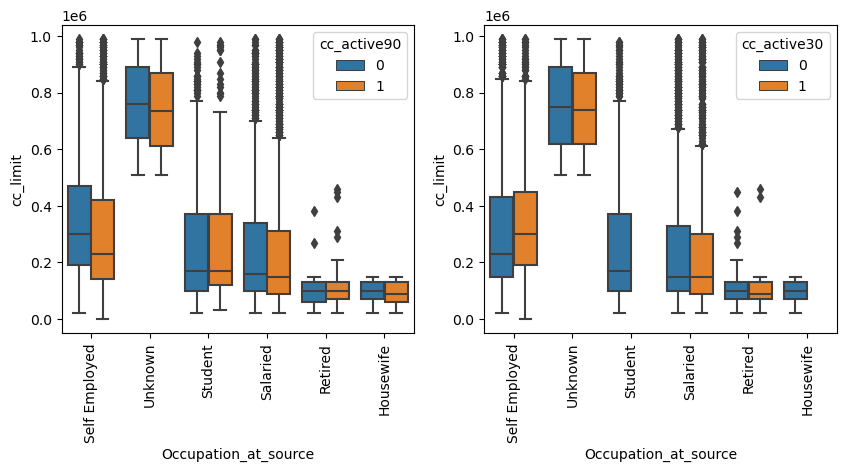

In [85]:
# boxplot for credit card limit by credit card activity and occupation
print('boxplot for credit card limit by credit card activity and occupation')
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
sns.boxplot(data = cc_data, x = 'Occupation_at_source', y = 'cc_limit', hue = 'cc_active90', ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.boxplot(data = cc_data, x = 'Occupation_at_source', y = 'cc_limit', hue = 'cc_active30', ax = axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
plt.show()

#### Observation
Credit card limit appears to impact attrition, as occupation types with lower limits such as housewives and students exhibit full attrition. Conversely, for other occupation types like salaried and self-employed individuals— who hold the highest number of credit cards— the median values of credit card limits for active users have also increased. This suggests that customers with lower limits have ceased using their credit cards.

boxplot for annual income by credit card activity and occupation


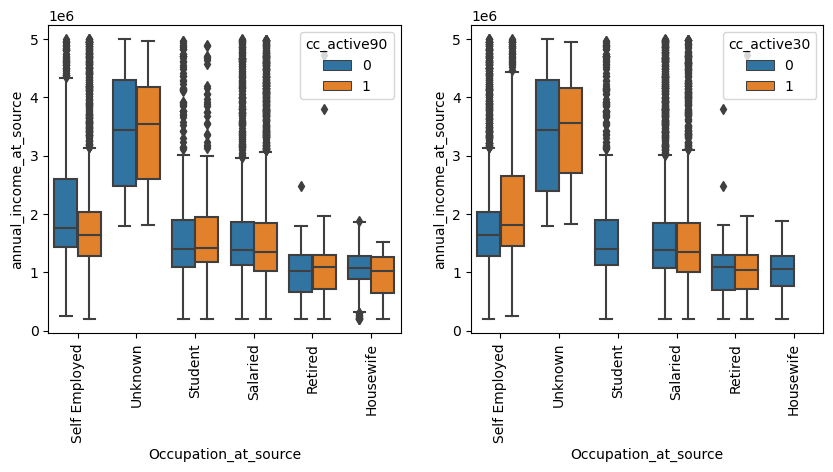

In [86]:
# boxplot for annual income by credit card activity and occupation
print('boxplot for annual income by credit card activity and occupation')
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
sns.boxplot(data = cc_data, x = 'Occupation_at_source', y = 'annual_income_at_source', hue = 'cc_active90', ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
sns.boxplot(data = cc_data, x = 'Occupation_at_source', y = 'annual_income_at_source', hue = 'cc_active30', ax = axs[1])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
plt.show()

#### Observation
Annual income appears to impact attrition, as occupation types with lower annual income such as housewives and students exhibit full attrition. Conversely, for other occupation types like salaried and self-employed individuals— who hold the highest number of credit cards— the median values of annual income for active users have also increased. This suggests that customers with lower annual income have ceased using their credit cards.

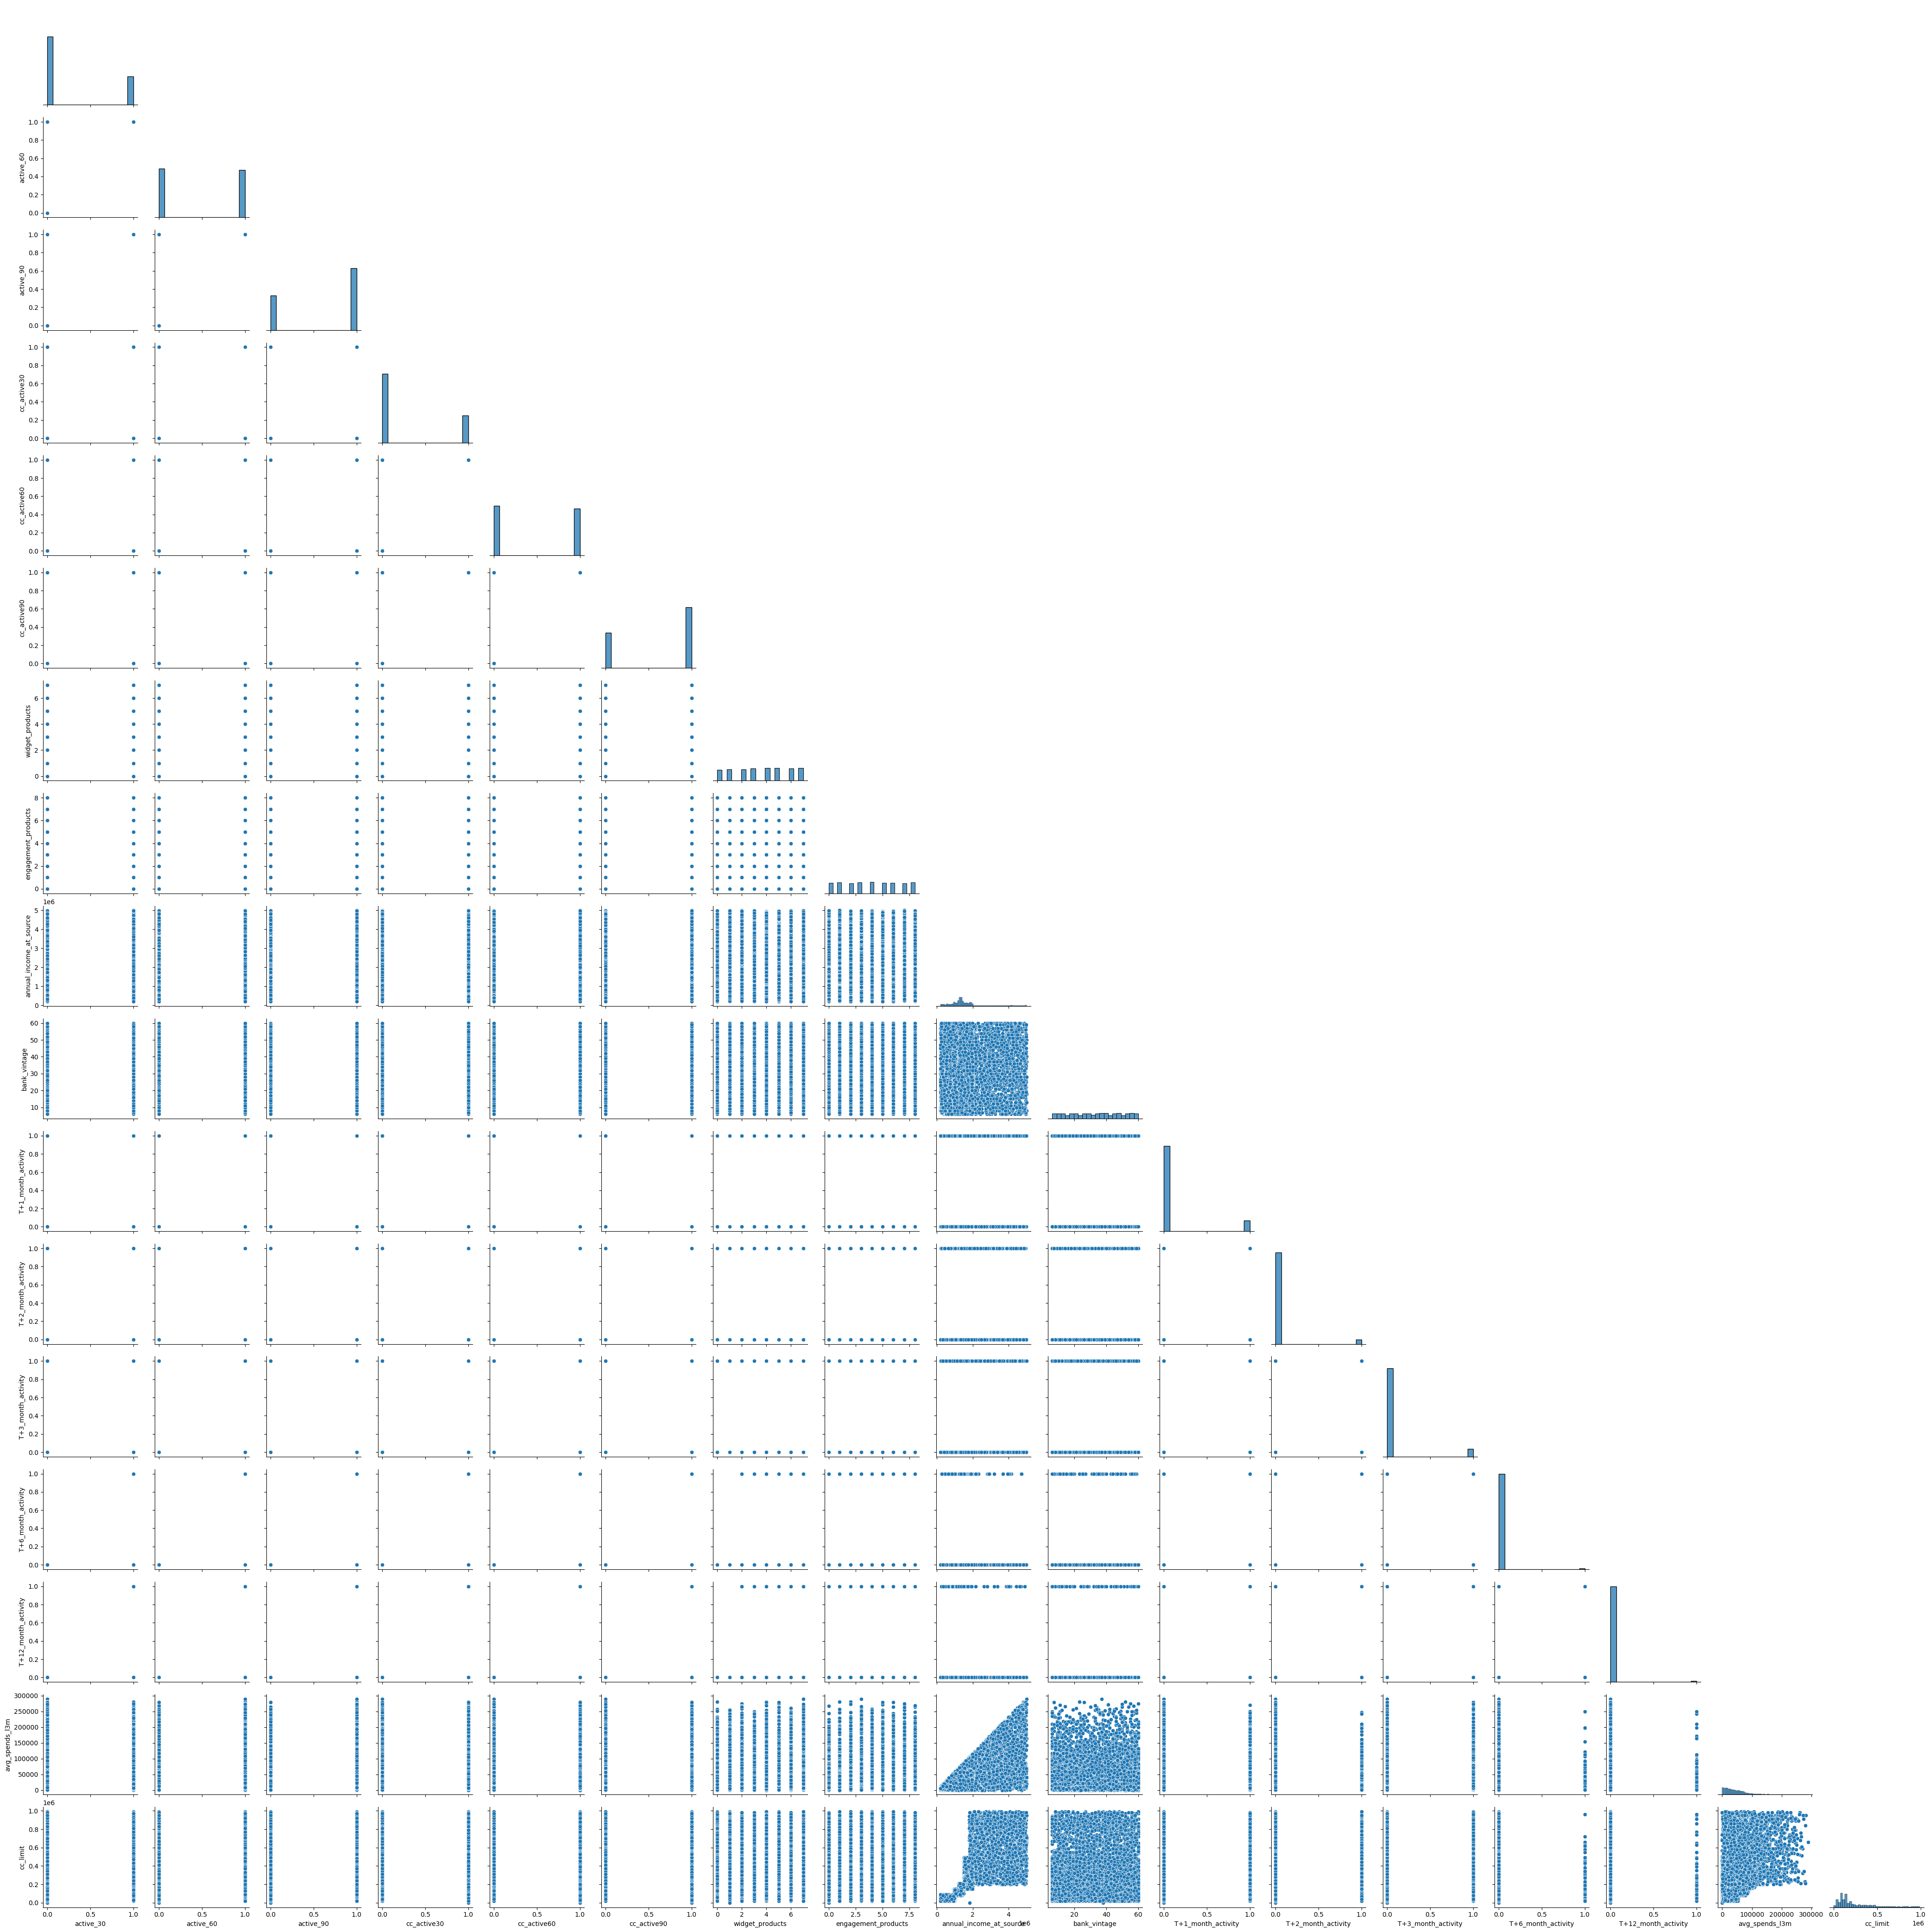

In [87]:
# Pair plot to understand correlation amongst numeric variables
sns.pairplot(data = cc_data, corner = True)
plt.show()

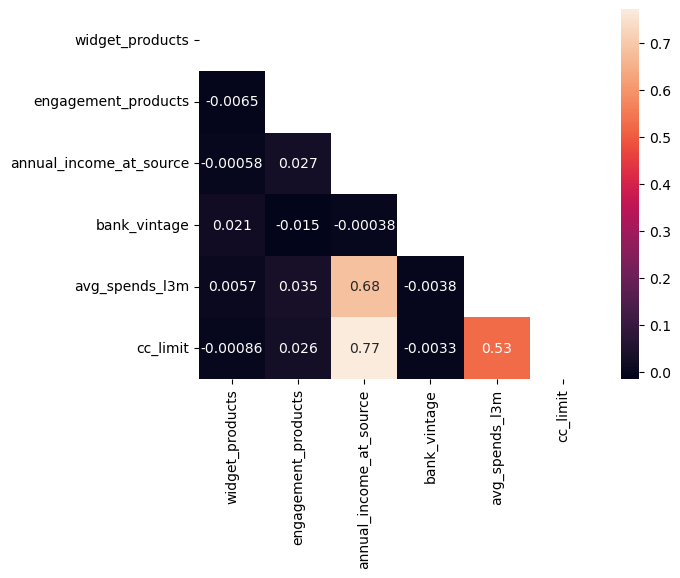

In [88]:
# Heatmap
mask = np.triu(np.ones_like(cc_data.select_dtypes(include=['int64']).corr(), dtype = 'bool'))
sns.heatmap(data = cc_data.select_dtypes(include=['int64']).corr(), annot = True, mask = mask)
plt.show()

#### Observation
Based on the pairplot and heatmap we can find significant correlattion only for cc_limit, annual_income_at_source and avg_spends_l3m.